
# K dimensional Linear Regression 

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

#Data Preparation

* Separate a portion of the data for training and another portion for validation/testing. In this case, 70/30.

In [10]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


# Modelo
$$h(x_i) = x_{i1}w_1 + x_{i2}w_2 + ... + x_{ik}w_k + b \rightarrow h(X) = XW^t$$


In [11]:
def h(X, W):
    return np.dot(X, W.T)

# Loss function
$$\mathcal{L} = \frac{1}{2n}\sum_{i=0}^n (y_i - h(x_i))^2 \rightarrow \mathcal{L} =  \frac{||Y - h(X)||^2_2}{2n}$$

In [12]:
def Error(X, Y, W): 
    n = len(X)
    e = Y - h(X,W)
    return 1/(2*n) * ((np.linalg.norm(e, 2))**2)


# Derivatives
$$\frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))(-x_{ij}) \rightarrow \frac{\partial \mathcal{L}}{\partial W} = \frac{(Y - h(X))^t * (-1 * X)}{n}$$

In [13]:
def derivada(X, Y, W):
    n = len(x)
    e = Y - h(X,W)
    dW = 1/n * np.dot(e.T, -1 * X)
    return dW


# Actualiación de parámetros




In [14]:
def update(W, dW, alpha):
    W = W - alpha * dW
    return W

# Training

In [16]:
def train(X, Y, epochs, alpha):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    L = Error(X, W, Y)
    loss = []
    for i in range(epochs):
        dW = derivada(X, Y, W)
        W = update(W, dW, alpha)
        L = Error(X, W, Y)
        loss.append(L)
        if i%100000==0:
            print(L)
    return W, loss


def Plot_Loss(epochs,loss):
    plt.plot(epochs, loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function')


# Testing

In [13]:
def test(X, Y, W):
    ypred = h(X, W)
    error = Error(X, Y, W)
    print(error)
    plt.plot(x, ypred, 'o', color='red')
    plt.show()


## Database

In [ ]:
# Read the dataset
# dataset = pd.read_csv('/content/drive/MyDrive/UTEC/CURSOS/2021.2/Inteligencia Artificial/DataSet/Practica/db.csv')
dataset = pd.read_csv('./db.csv')
x = (dataset[['income']]).to_numpy()
y = (dataset[['happiness']]).to_numpy()

data = pd.DataFrame(dataset[['income','happiness']])


# Normalizing
# max - xi / max - min
# x = (np.max(x) - x) / (np.max(x) - np.min(x))
# y = (np.max(y) - y) / (np.max(y) - np.min(y))


# Exploratory Data Analysisa
plt.plot(x,y,'.')
plt.xlabel('income')
plt.ylabel('happiness')
plt.title('Gráfico de ingreso vs felicidad')

First w:  0.16712564290910148 First b:  0.0809980368884986 First Loss:  4.1777309085031495
w:  0.18058489252339183 b:  0.08362506029206868 Loss:  3.9919338833285054
w:  0.19372125534777188 b:  0.08618910746433239 Loss:  3.8149442203407435
w:  0.20654247721574337 b:  0.08869168915629094 Loss:  3.6463444229190642
w:  0.21905611814358 b:  0.0911342798770669 Loss:  3.485736785093335
w:  0.23126955678795502 b:  0.09351831876332196 Loss:  3.332742453405123
w:  0.2431899947966337 b:  0.09584521042781802 Loss:  3.1870005332394387
w:  0.25482446105479534 b:  0.09811632578762179 Loss:  3.048167237519175
w:  0.2661798158294893 b:  0.10033300287244147 Loss:  2.915915075754092
w:  0.27726275481466794 b:  0.10249654761357184 Loss:  2.7899320815314397
w:  0.28807981307918246 b:  0.10460823461391315 Loss:  2.6699210766259367
w:  0.2986373689200686 b:  0.10666930789951784 Loss:  2.555598969993256
w:  0.30894164762339504 b:  0.10868098165310809 Loss:  2.446696089993413
w:  0.31899872513489136 b:  0.1106

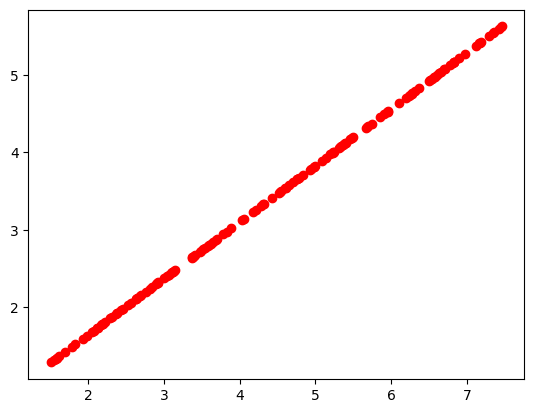

In [14]:
epochs = 1000
alfa = 0.001
b, w, loss = train(x_train, y_train, alfa, epochs)

print("Average error:", np.average(loss))

test(x_test, y_test, w, b)

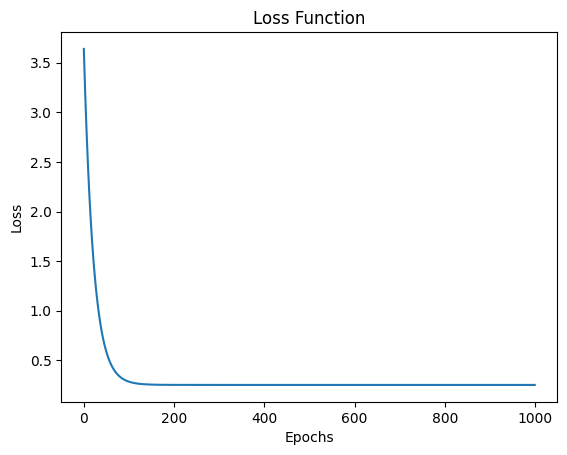

In [26]:
Plot_Loss(range(epochs), loss)

After Executing the Practice
If your model converges, do you notice that the error value fluctuates, going up and down? If so, what do you think could be causing this behavior?

Now, transform the values of X and Y to be within the range [0,1], that is, normalize the data using the following equation: v = (v - min) / (max - min), where v can be either x or y, depending on which variable you are normalizing. Then, run your code again.

If your code is correct, you should observe that the error function decreases more steadily. Why do you think this happens?

What is the average training error of your model?

What is the average testing error of your model?

Plot the evolution of the training error over time.

Train your model with different values of α {0.5, 0.1, 0.01, 0.001, 0.00001} and, after training, check the average error on the corresponding tests.

What happens when the value of α is close to 1, and what happens if it is very small?